In [1]:
#K nearest neighbor we look at k take the most freq neighbor and categories it with the same 
#to get the distance  use -> eucledian sqrt((q1 - p 1 ) ^ 2 + .. for each axes (depend how many dymention w ehave x y z ..)


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [4]:
points = {"blue":[[2,4],[1,3],[2,3],[3,2],[2,1]],
           "red": [[5,6],[4,5],[4,6],[6,6],[5,4]]}

In [6]:
def euclidean_distance(a,b):
    np.sqrt(np.sum(np.array(a) - np.array(b)))

In [20]:
from collections import Counter
import math

def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))

class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k
        self.points = None
    
    def fit(self, points):
        self.points = points
    
    def predict(self, new_point):
        distances = []
        # Ensure new_point is a list or tuple of numeric values
        new_point = [float(coord) for coord in new_point]
        for category, points in self.points.items():
            for point in points:
                # Ensure point is a list or tuple of numeric values
                point = [float(coord) for coord in point]
                distance = euclidean_distance(point, new_point)
                distances.append((distance, category))
        # Sort distances and get the most common categories
        categories = [c for _, c in sorted(distances)[:self.k]]
        result = Counter(categories).most_common(1)[0][0]
        return result


In [9]:
clf = KNearestNeighbors()
clf.fit(points)

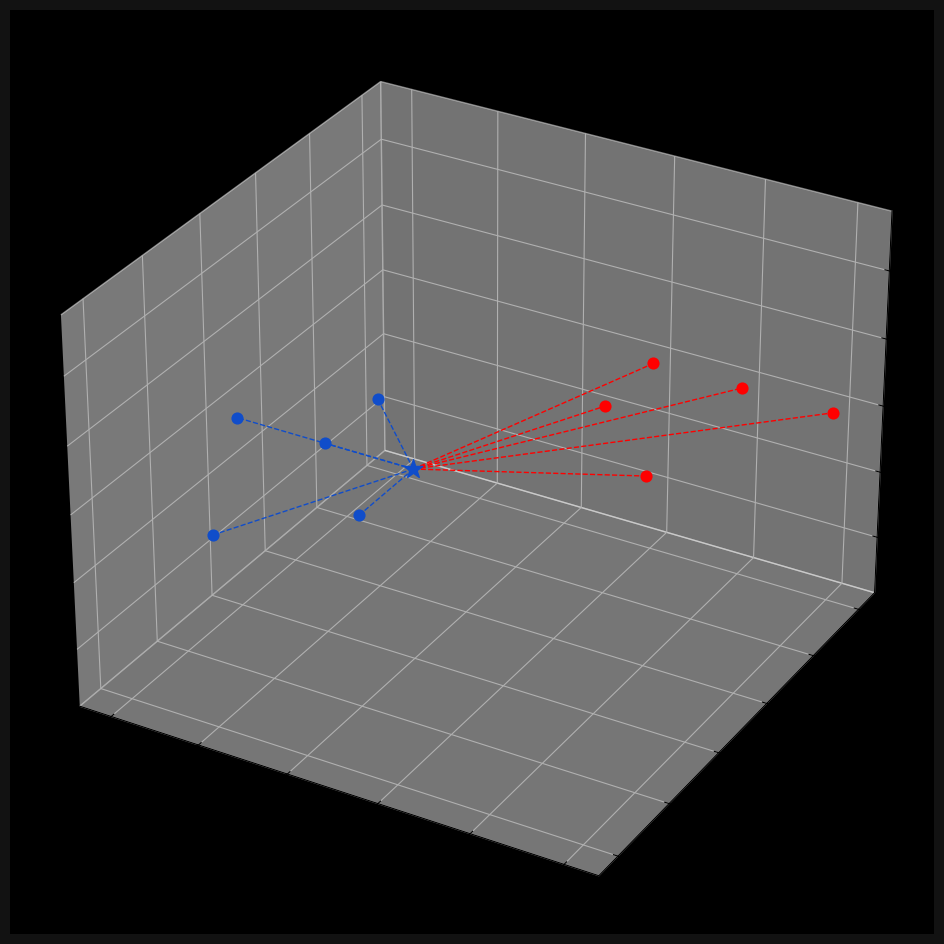

In [35]:
import matplotlib.pyplot as plt

new_point = [3,3]
new_point = [float(coord) for coord in new_point]


#ax = plt.subplot()
fig = plt.figure(figsize = (15,12))
ax = fig.add_subplot(projection = "3d")
ax.set_facecolor("black")
ax.grid(True, color="#323232")
ax.figure.set_facecolor("#121212")

# Scatter plot for blue points
for p in points['blue']:
    ax.scatter(p[0], p[1], color="#104DCA", s=60)

# Scatter plot for red points
for p in points['red']:
    ax.scatter(p[0], p[1], color="#FF0000", s=60)

# Predict the class for new_point
new_classs = clf.predict(new_point)  # Pass new_point directly, not in a list
color = "#FF0000" if new_classs == "red" else "#104DCA"

# Scatter plot for new_point
ax.scatter(new_point[0], new_point[1], color=color, marker="*", s=200, zorder=100)

# Plot lines from new_point to each point in blue
for p in points['blue']:
    ax.plot([new_point[0], p[0]], [new_point[1], p[1]], color="#104DCA", linestyle="--", linewidth=1)

# Plot lines from new_point to each point in red
for p in points['red']:
    ax.plot([new_point[0], p[0]], [new_point[1], p[1]], color="#FF0000", linestyle="--", linewidth=1)

plt.show()
